<a href="https://colab.research.google.com/github/Yusra-Zafar/Deep-Learning/blob/main/MLP-classification/customer_churn_pred_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction using MLP (binary classification problem)

## EDA and Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# load dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# remove unnecessary features
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
# one-hot encoding categorical features
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

## Getting model ready

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [ ]:
y_train.shape, y_test.shape

((8000,), (2000,))

### setting up MLP

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
# first layer directly taking input features
model.add(Dense(11, activation = 'relu', input_dim = 11))

# hidden layer
model.add(Dense(7, activation='relu'))

# output layer for binary classification
model.add(Dense(1, activation = 'sigmoid'))

![](https://drive.google.com/uc?id=1l1ypSoBQ1mcG5p-XWh3j-CN4UQCjK-fy)

In [ ]:
# compiling model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

### training

In [ ]:
# training/fitting
history = model.fit(x = X_train, y=y_train, epochs = 20, validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 2s 6ms/step - loss: 0.5343 - accuracy: 0.7367 - val_loss: 0.4831 - val_accuracy: 0.7881
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.8009 - val_loss: 0.4578 - val_accuracy: 0.8006
Epoch 3/20
200/200 [==============================] - 1s 5ms/step - loss: 0.4416 - accuracy: 0.8094 - val_loss: 0.4447 - val_accuracy: 0.8037
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.8139 - val_loss: 0.4337 - val_accuracy: 0.8112
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8208 - val_loss: 0.4220 - val_accuracy: 0.8156
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8263 - val_loss: 0.4076 - val_accuracy: 0.8231
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8330 - val_loss: 0.3972 - val_accuracy: 0.8256
Epoch 

### testing

In [ ]:
# model testing
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[0.06738111],
       [0.06855526],
       [0.14386632],
       ...,
       [0.05444627],
       [0.07272646],
       [0.43352333]], dtype=float32)

In [ ]:
# use threshold of 0.5 for binary classification
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.842

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### visualizing performance

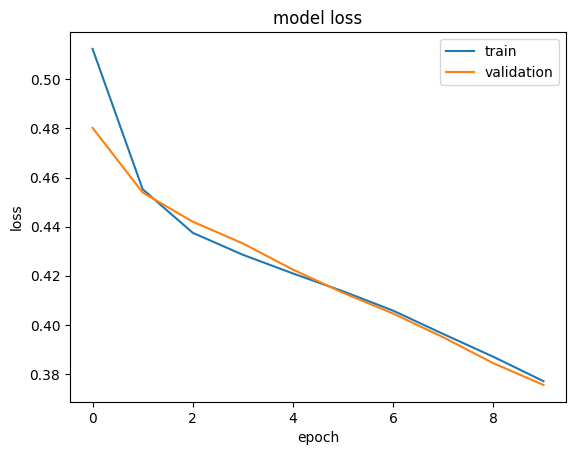

In [ ]:
# plot line graphs of train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

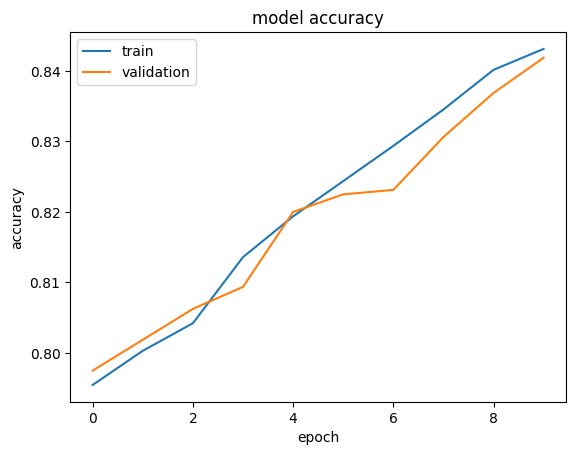

In [ ]:
# plot line graphs of train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()